# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [117]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [118]:
import pandas as pd

df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [120]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


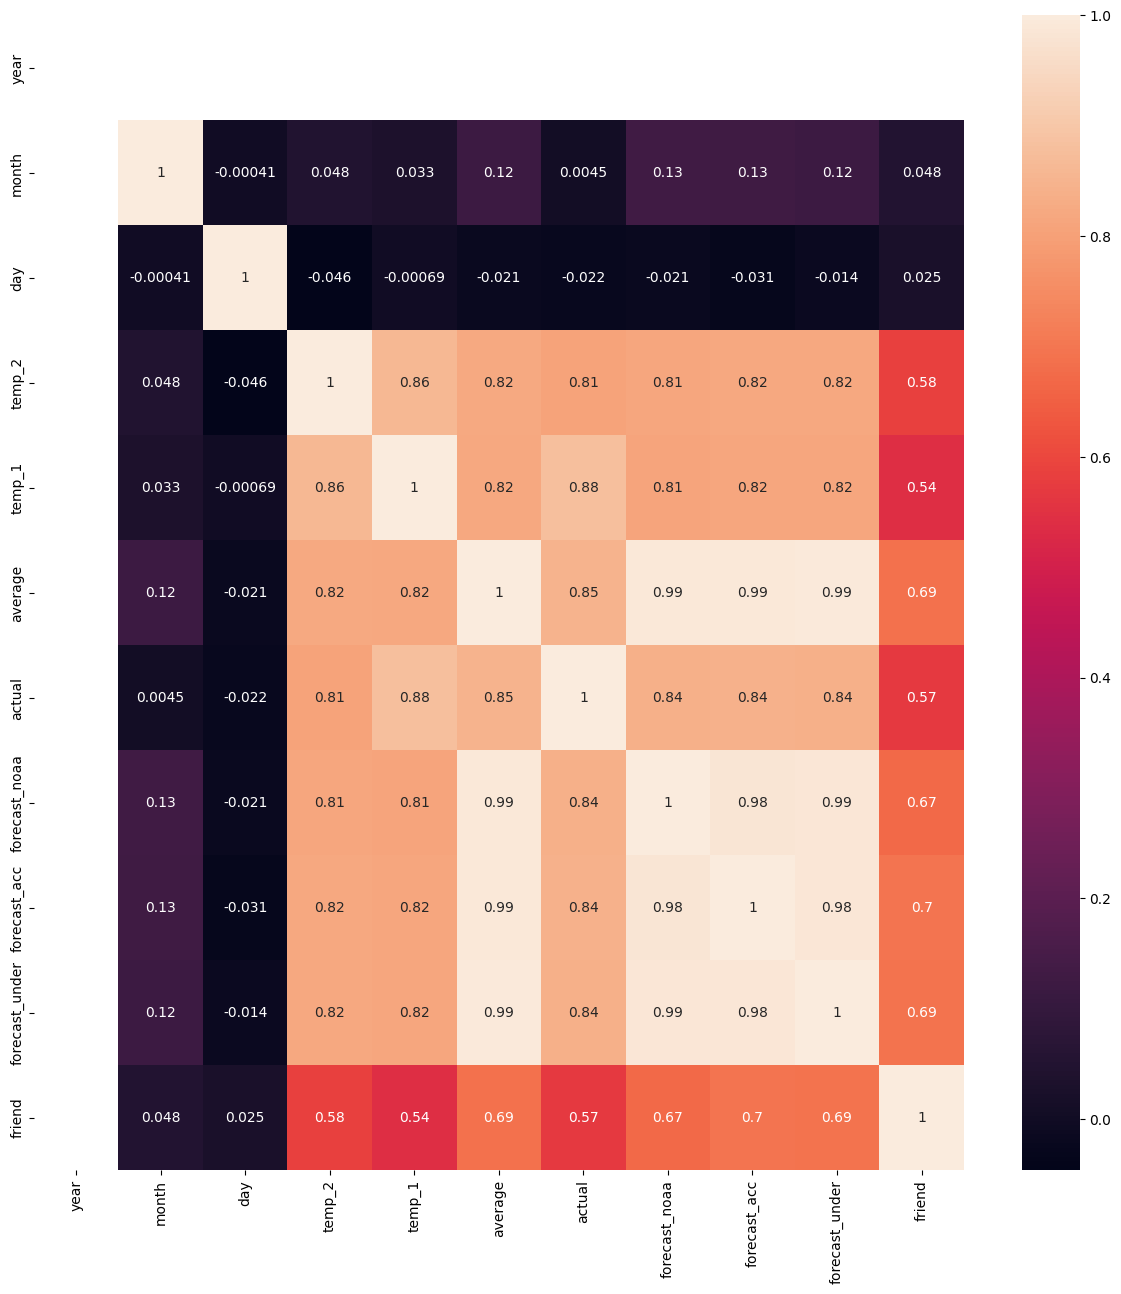

In [123]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot= True);

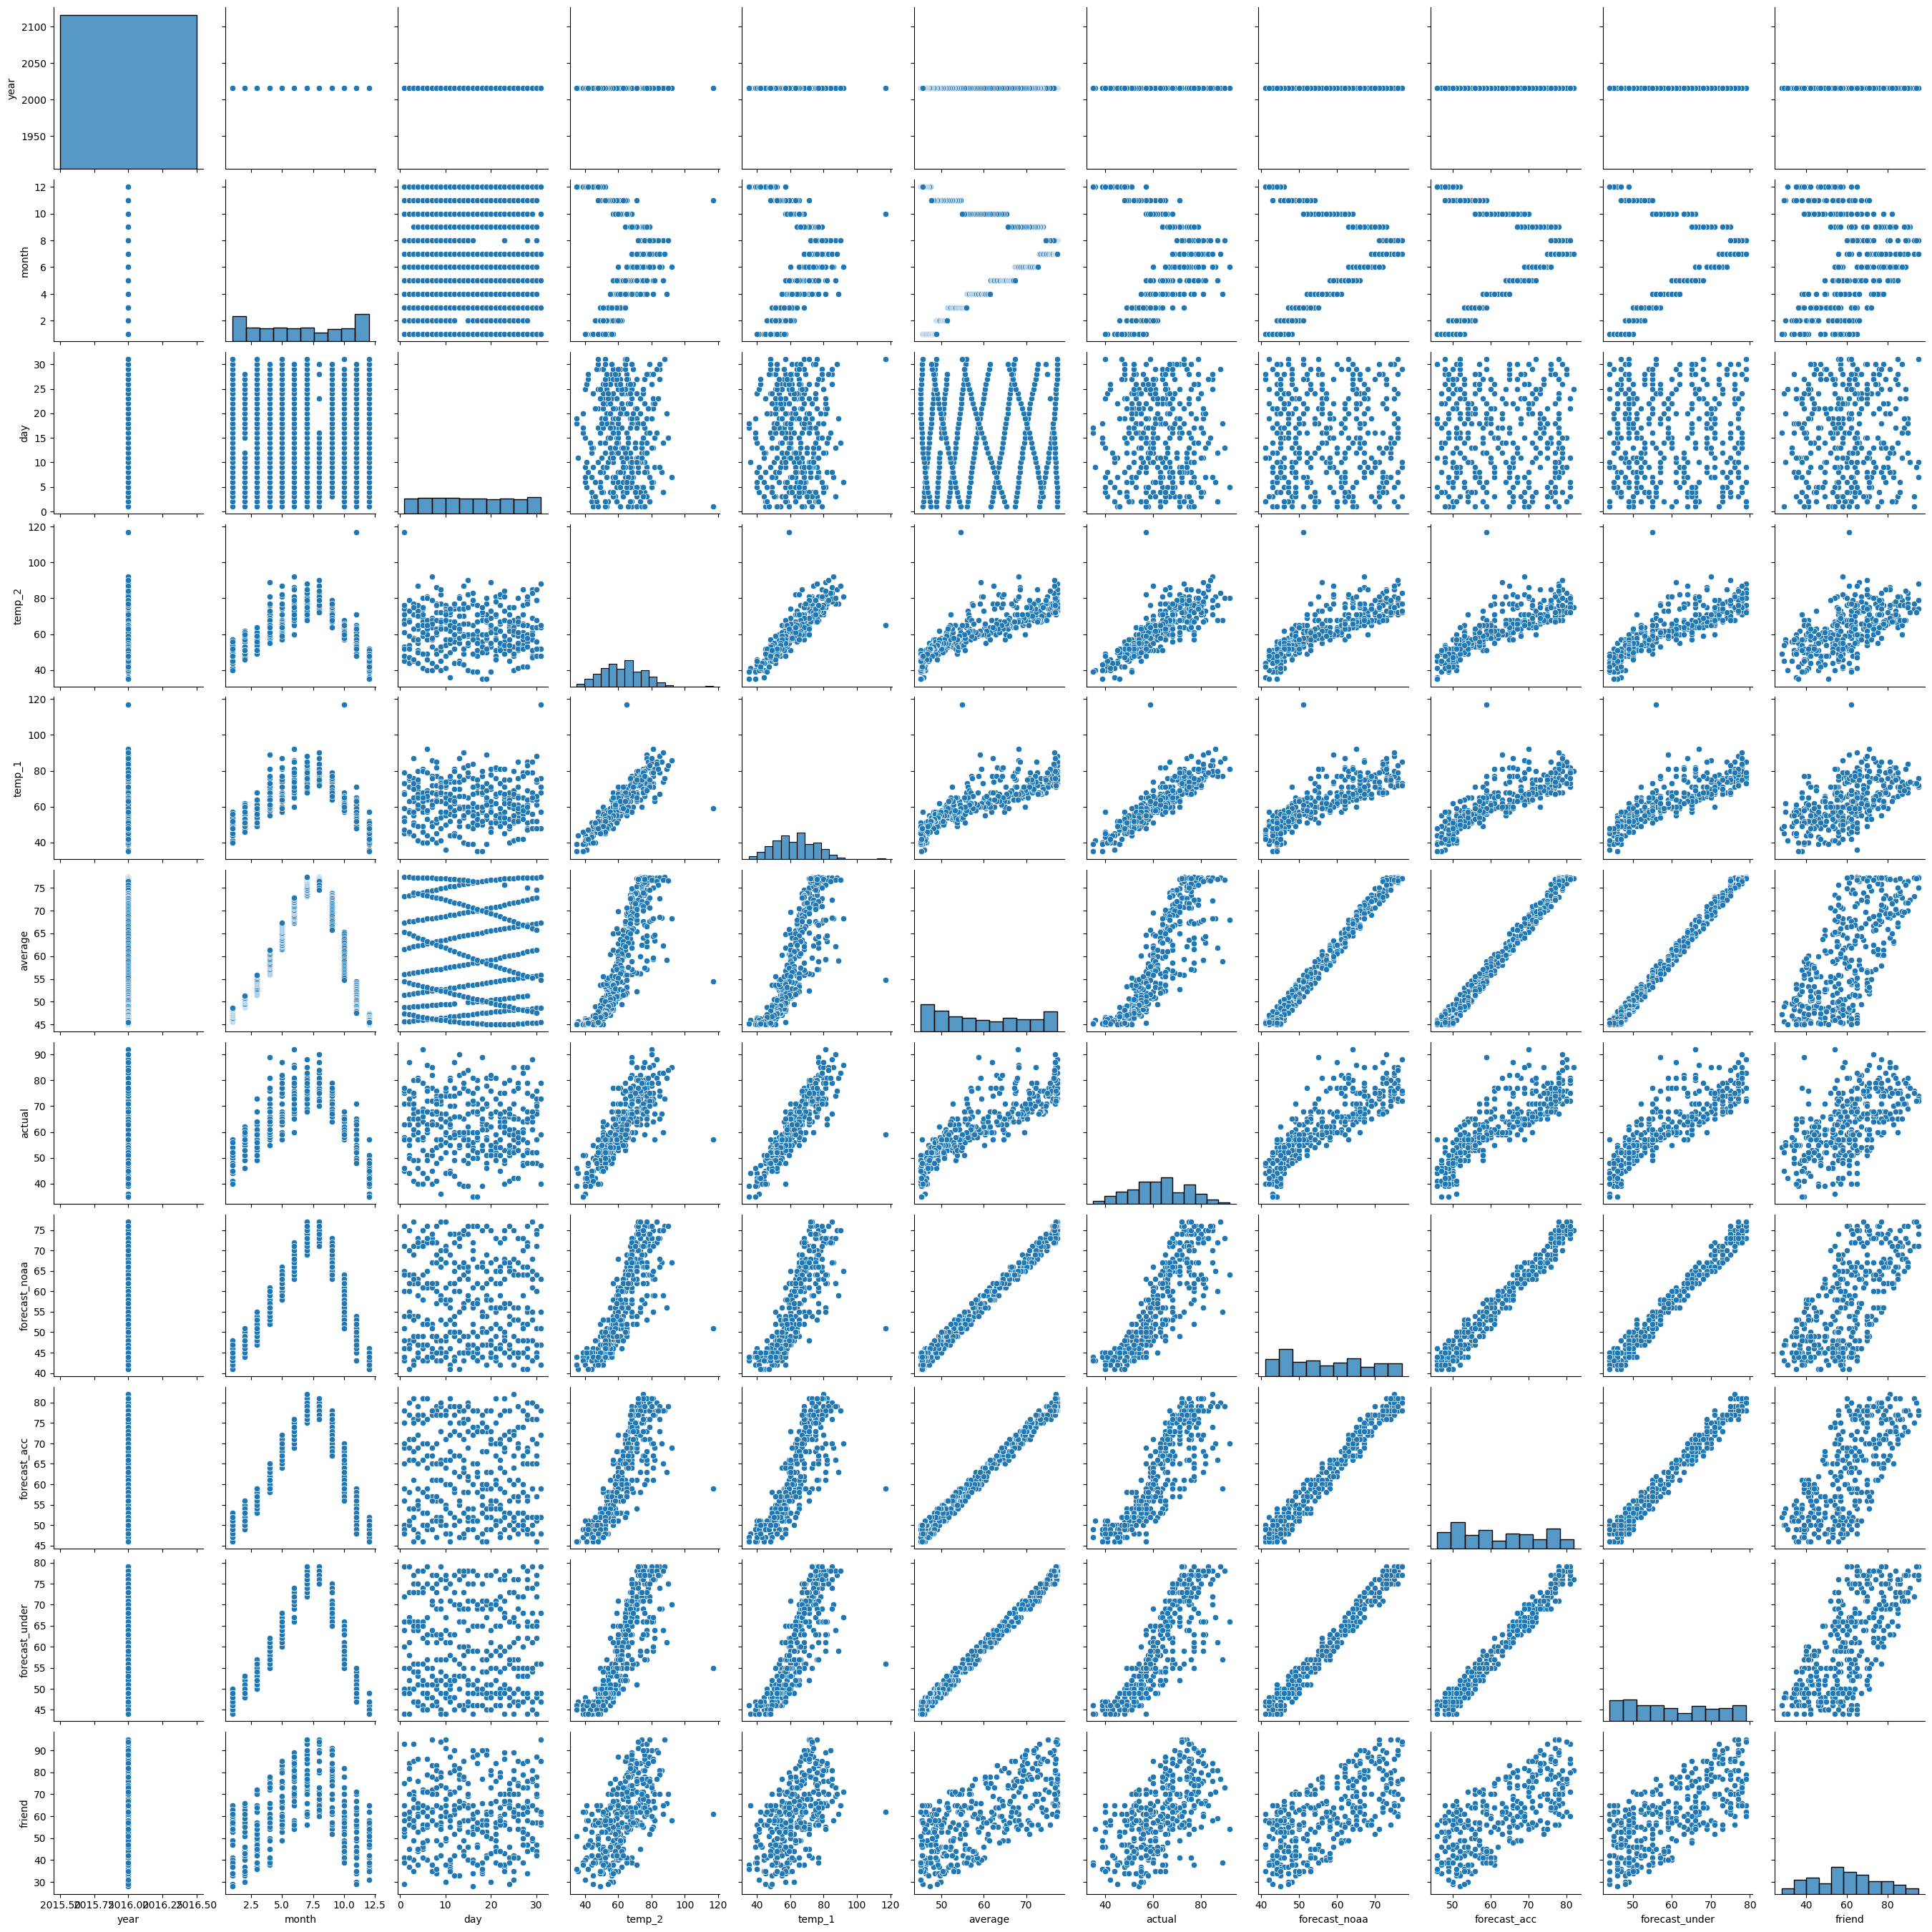

In [124]:
sns.pairplot(df)

### 2. Trabaja las variables categóricas del dataset

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [127]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [128]:
dict_weekdays = {'Fri': 5, 'Sat': 6, 'Sun': 7, 'Mon': 1, 'Tues': 2, 'Wed': 3, 'Thurs': 4}

In [129]:
df['week_days'] = df['week'].map(dict_weekdays)

In [130]:
df['week_days']

0      5
1      6
2      7
3      1
4      2
      ..
343    2
344    3
345    4
346    5
347    6
Name: week_days, Length: 348, dtype: int64

<AxesSubplot:>

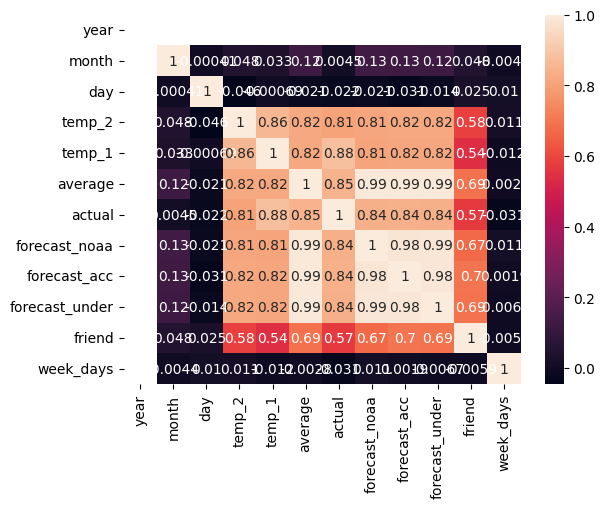

In [131]:
sns.heatmap(df.corr(), annot= True)

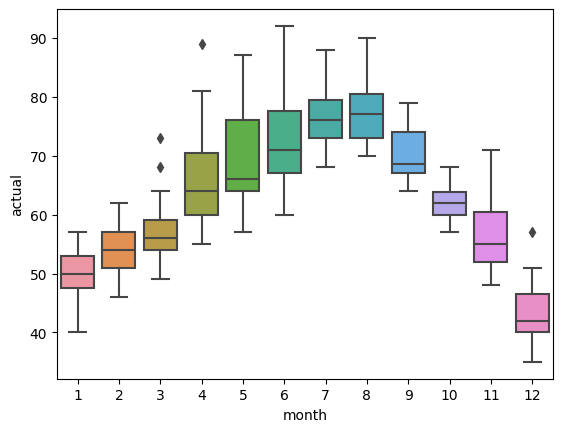

In [133]:
sns.boxplot(x = df['month'], y= df['actual']);

In [134]:
season_dict = {12: 1, 1: 1, 2: 1, 3:1, 4: 2, 10: 2, 11: 2, 5: 3, 6: 3, 10: 3, 9: 3, 7: 4, 8:4}

In [135]:
df['season'] = df['month'].map(season_dict)

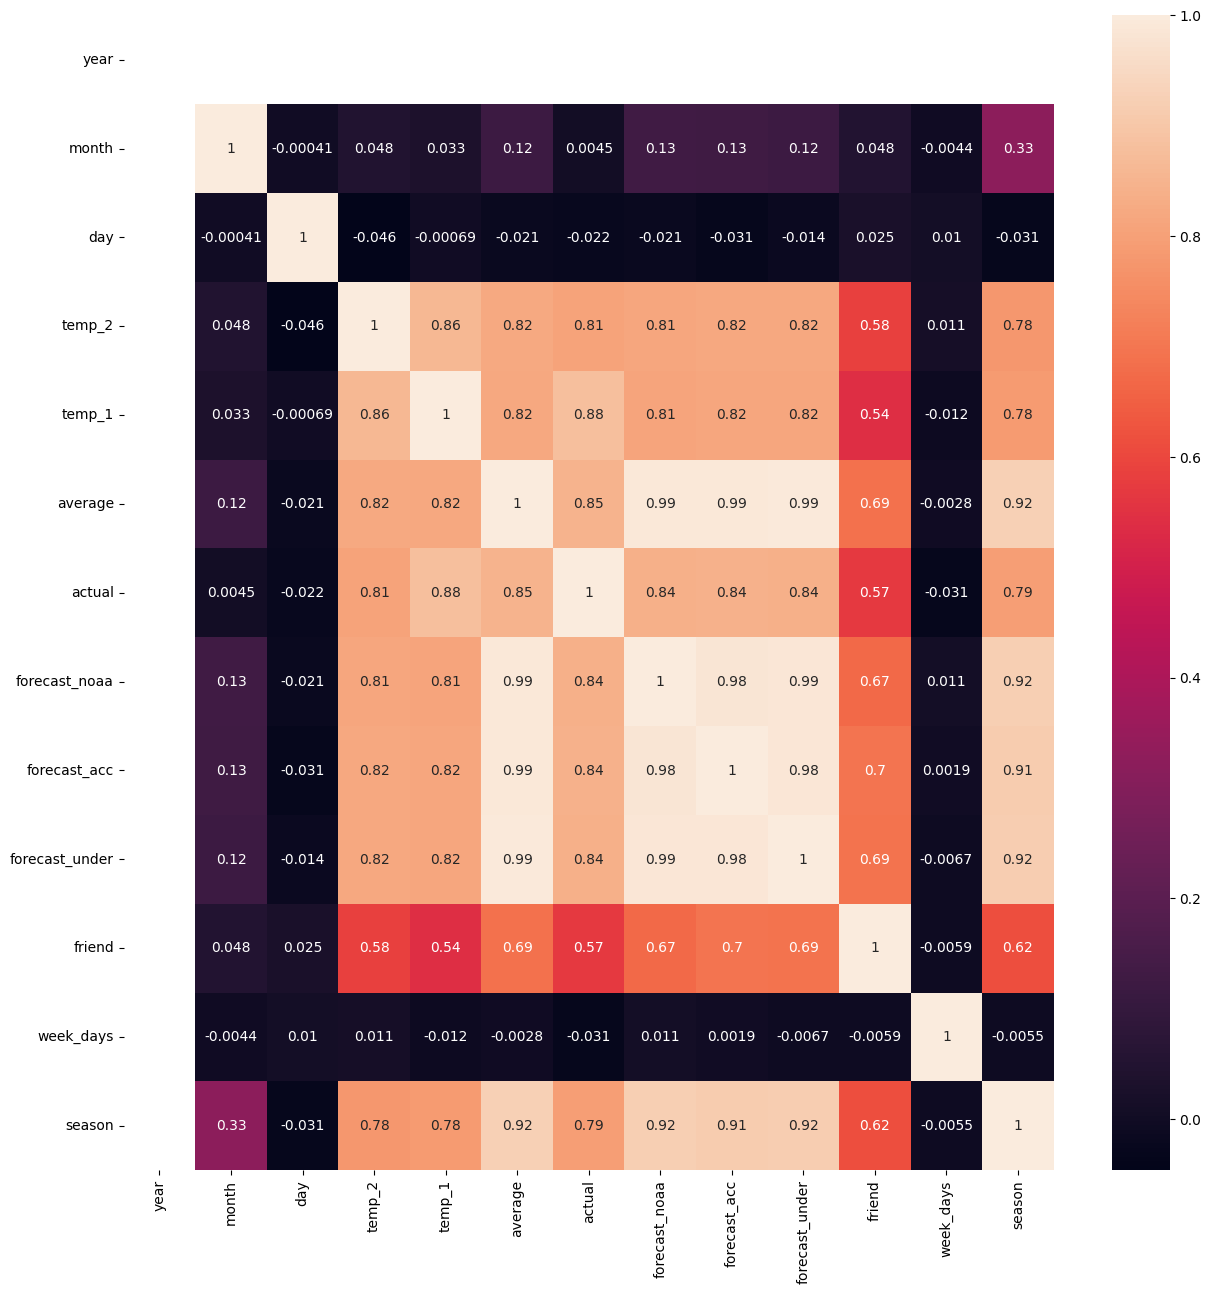

In [138]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot= True);

In [140]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_days,season
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,5,1
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,6,1
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,7,1
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,1,1
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2,1


### 3. Divide en train y test

In [142]:
X = df[['temp_1', 'average', 'forecast_noaa', 'season']]
Y = df['actual']

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state= 42)

In [145]:
print('X_train_shape: ', X_train.shape)
print('X_test_shape: ', X_test.shape)
print('Y_train_shape: ', Y_train.shape)
print('Y_test_shape: ', Y_test.shape)

X_train_shape:  (278, 4)
X_test_shape:  (70, 4)
Y_train_shape:  (278,)
Y_test_shape:  (70,)


### 4. Entrena el modelo


In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
dtr_model = DecisionTreeRegressor(random_state= 42)
dtr_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [148]:
print('Train errors: ')
print('-' * 15)
print('MAE: ', mean_absolute_error(Y_train, dtr_model.predict(X_train)))
print('MAPE: ', mean_absolute_percentage_error(Y_train, dtr_model.predict(X_train)))
print('MSE: ', mean_squared_error(Y_train, dtr_model.predict(X_train)))
print('RMSE: ', np.sqrt(mean_squared_error(Y_train, dtr_model.predict(X_train))))

print('\n')

print('Test errors: ')
print('-' * 15)
print('MAE: ', mean_absolute_error(Y_test, dtr_model.predict(X_test)))
print('MAPE: ', mean_absolute_percentage_error(Y_test, dtr_model.predict(X_test)))
print('MSE: ', mean_squared_error(Y_test, dtr_model.predict(X_test)))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, dtr_model.predict(X_test))))

Train errors: 
---------------
MAE:  0.0
MAPE:  0.0
MSE:  0.0
RMSE:  0.0


Test errors: 
---------------
MAE:  5.328571428571428
MAPE:  0.08375042184894423
MSE:  46.957142857142856
RMSE:  6.852528209146086


### 6. Representa el árbol de decision

In [149]:
from sklearn.tree import plot_tree

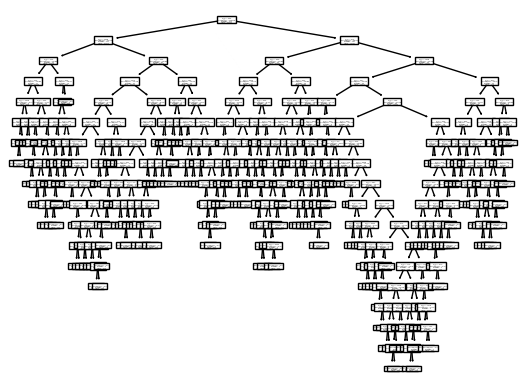

In [151]:
plot_tree(dtr_model);

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [152]:
dtr_model_md3 = DecisionTreeRegressor(max_depth= 3, random_state= 42)
dtr_model_md3.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [154]:
print('Train errors: ')
print('-' * 15)
print('MAE: ', mean_absolute_error(Y_train, dtr_model_md3.predict(X_train)))
print('MAPE: ', mean_absolute_percentage_error(Y_train, dtr_model_md3.predict(X_train)))
print('MSE: ', mean_squared_error(Y_train, dtr_model_md3.predict(X_train)))
print('RMSE: ', np.sqrt(mean_squared_error(Y_train, dtr_model_md3.predict(X_train))))

print('\n')

print('Test errors: ')
print('-' * 15)
print('MAE: ', mean_absolute_error(Y_test, dtr_model_md3.predict(X_test)))
print('MAPE: ', mean_absolute_percentage_error(Y_test, dtr_model_md3.predict(X_test)))
print('MSE: ', mean_squared_error(Y_test, dtr_model_md3.predict(X_test)))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, dtr_model_md3.predict(X_test))))

Train errors: 
---------------
MAE:  3.675752083754991
MAPE:  0.05874668452706153
MSE:  22.14996536445183
RMSE:  4.706374970659672


Test errors: 
---------------
MAE:  4.267242249556827
MAPE:  0.0674392768128964
MSE:  30.946461197509944
RMSE:  5.5629543587476915


### 9. Vuelve a representar su árbol

In [156]:
X.columns

Index(['temp_1', 'average', 'forecast_noaa', 'season'], dtype='object')

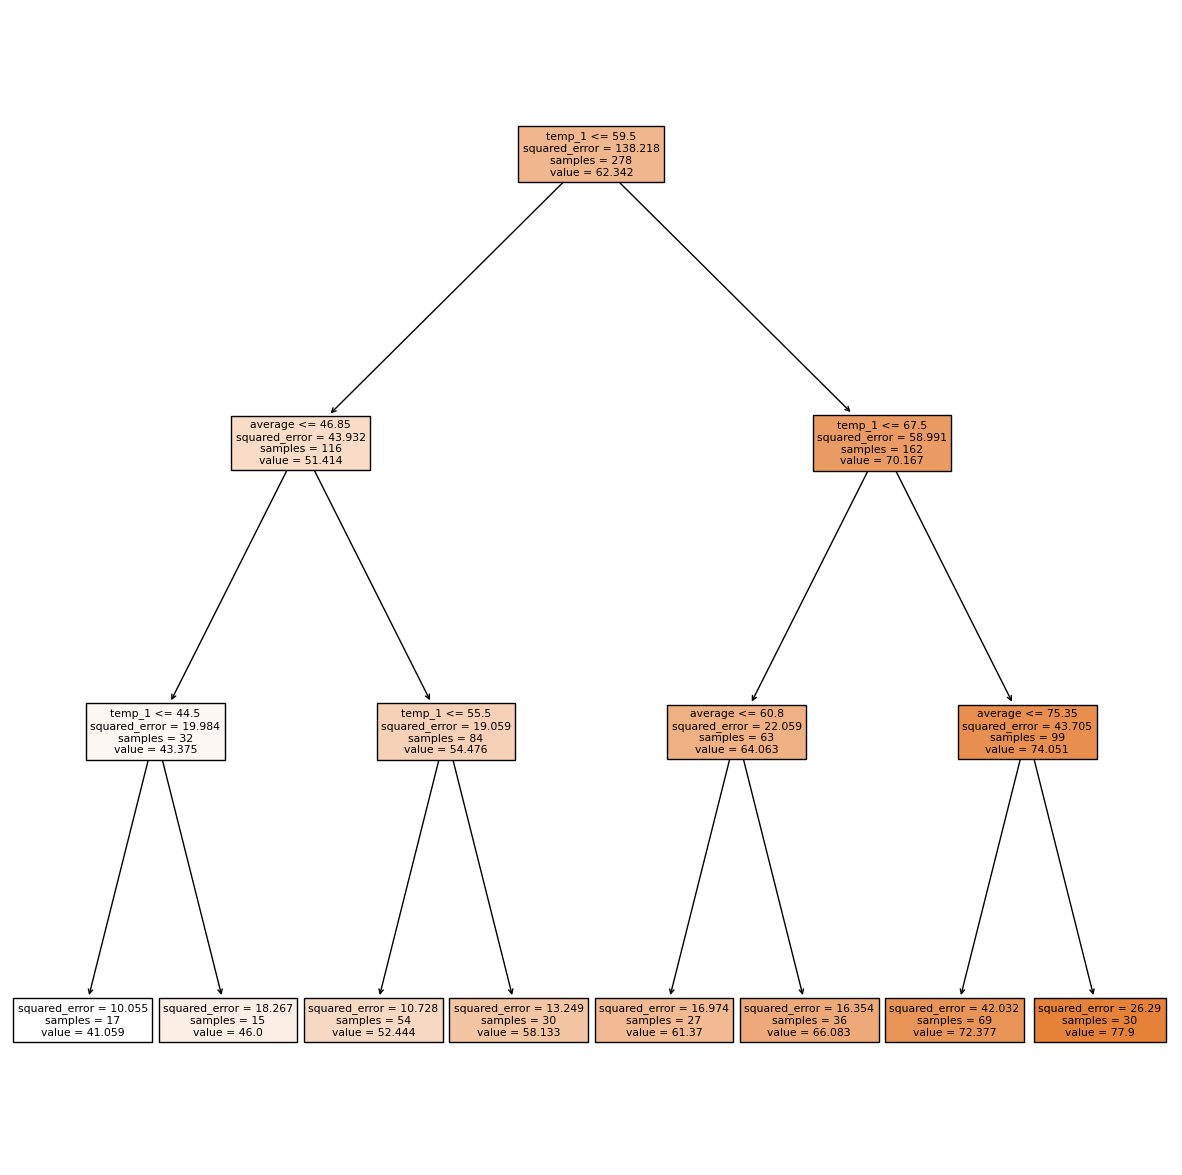

In [162]:
plt.figure(figsize= (15, 15))
plot_tree(dtr_model_md3, filled= True, feature_names=X.columns);

In [164]:
X.columns

Index(['temp_1', 'average', 'forecast_noaa', 'season'], dtype='object')

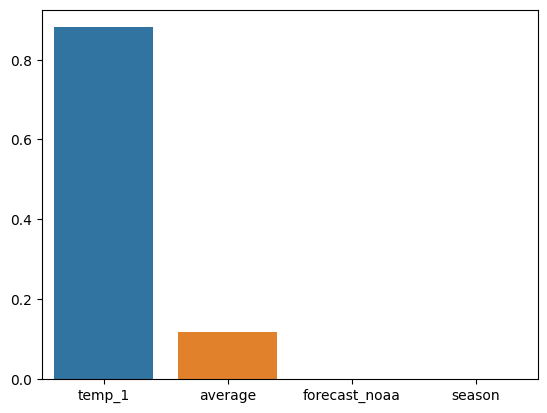

In [168]:
sns.barplot(x = X.columns, y = dtr_model_md3.feature_importances_);

### 10. Utiliza un grid search con cross validation.

In [169]:
from sklearn.model_selection import GridSearchCV

In [177]:
estimator = DecisionTreeRegressor()
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split':[2, 4, 5, 6, 7, 8, 10],
              'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10]}

gs_dt = GridSearchCV(estimator= estimator, param_grid = param_grid, cv = 5,scoring= 'neg_mean_absolute_error')

In [178]:
gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10]},
             scoring='neg_mean_absolute_error')

In [179]:
gs_dt.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)

In [180]:
gs_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [181]:
gs_dt.best_score_

-3.99838302755163

### 11. Obten el `feature_importances` de cada variable en el último modelo

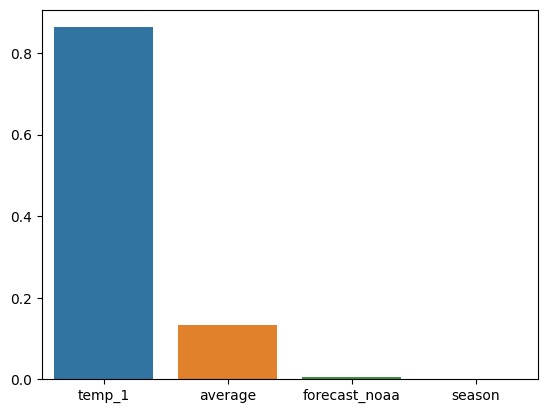

In [176]:
sns.barplot(x = X.columns, y = gs_dt.best_estimator_.feature_importances_);

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [183]:
df['actual'].min()

35

In [184]:
df['actual'].max()

92

In [185]:
df['class_target'] = np.where(df['actual'] > 59, 1, 0)

In [189]:
df['class_target'].value_counts()

1    204
0    144
Name: class_target, dtype: int64

In [187]:
X

,temp_1,average,forecast_noaa,season
0,45,45.6,43,1
1,45,45.7,41,1
2,44,45.8,43,1
3,41,45.9,44,1
4,40,46.0,46,1
...,...,...,...,...
343,42,45.2,41,1
344,47,45.3,41,1
345,48,45.3,43,1
346,48,45.4,44,1


In [192]:
X_train_class, X_test_class, Y_train_class, Y_test_class = train_test_split(X, df['class_target'], test_size= 0.20, random_state= 42)

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [196]:
dtc_model = DecisionTreeClassifier()
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split':[2, 4, 5, 6, 7, 8, 10],
              'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10]}

gs_dt = GridSearchCV(estimator= dtc_model, param_grid = param_grid, cv = 5,scoring= 'accuracy')

In [197]:
gs_dt.fit(X_train_class, Y_train_class)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10]},
             scoring='accuracy')

In [202]:
X_train_class.columns

Index(['temp_1', 'average', 'forecast_noaa', 'season'], dtype='object')

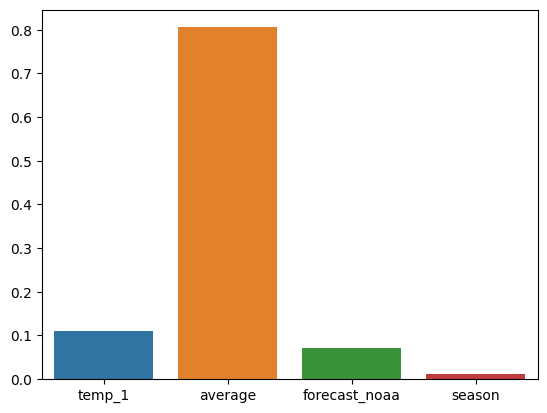

In [208]:
sns.barplot(x = X.columns, y = gs_dt.best_estimator_.feature_importances_);

In [206]:
gs_dt.best_params_

{'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 4}

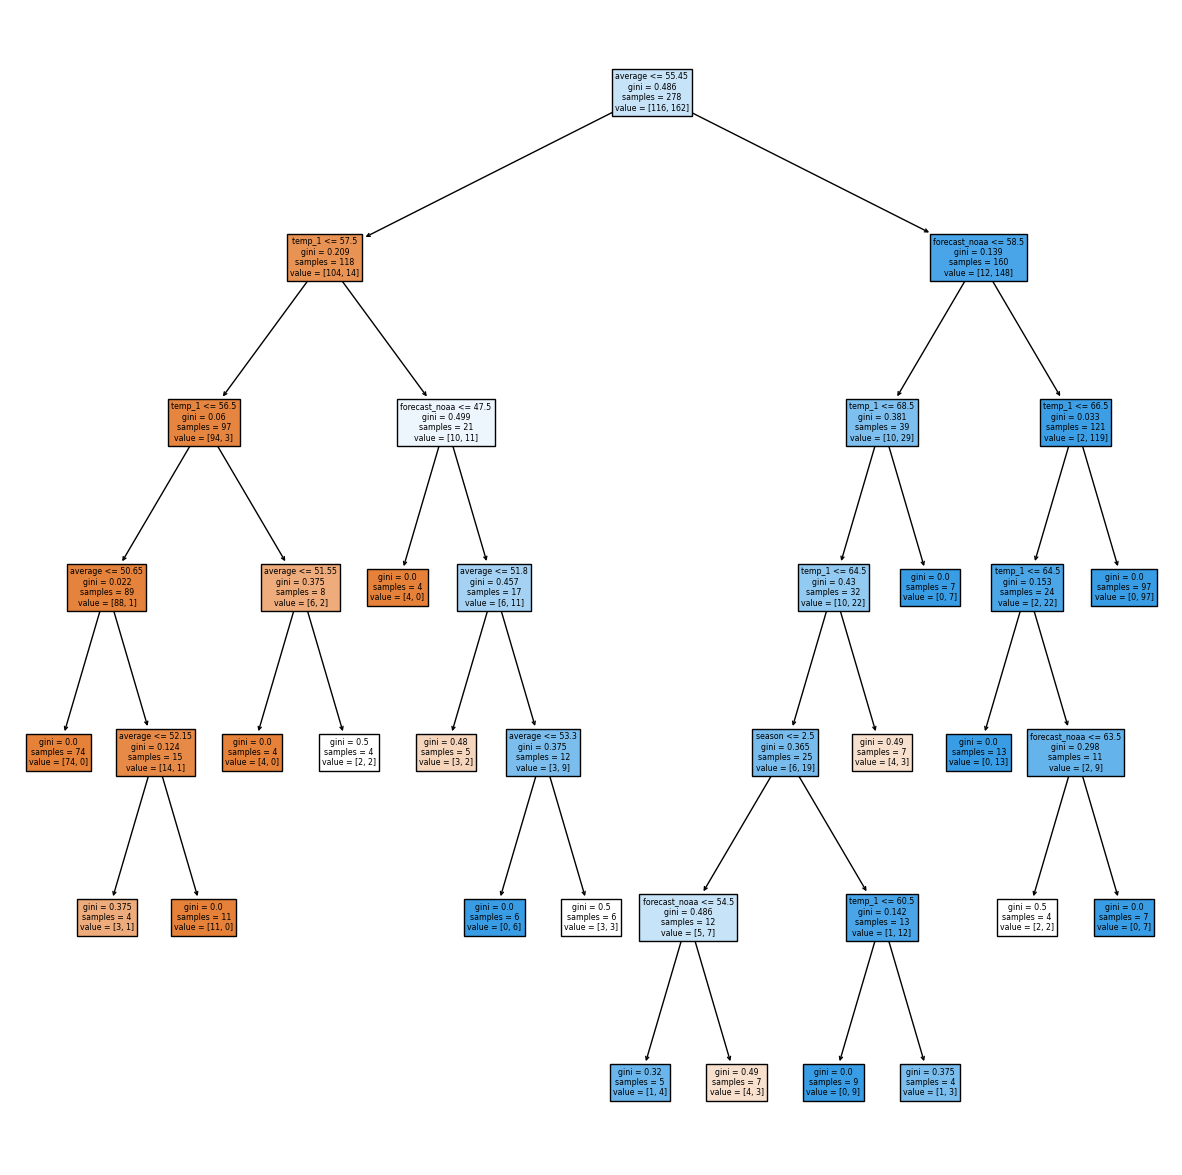

In [205]:
plt.figure(figsize= (15, 15))
plot_tree(gs_dt.best_estimator_, feature_names= X_train_class.columns, filled= True);

In [199]:
accuracy_score(Y_test_class,  gs_dt.predict(X_test_class))

0.8857142857142857

In [212]:
X.iloc[0].values

array([45. , 45.6, 43. ,  1. ])

In [214]:
X.columns

Index(['temp_1', 'average', 'forecast_noaa', 'season'], dtype='object')

In [213]:
gs_dt.predict([[45. , 45.6, 43. ,  1. ]])

c:\Users\migue\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [215]:
from sklearn.ensemble import RandomForestClassifier

In [216]:
rfc_model = RandomForestClassifier()
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8],
              'min_samples_split':[2, 4, 5, 6, 7, 8, 10],
              'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10],
              'n_estimators': [100, 150]}

gs_dt = GridSearchCV(estimator= rfc_model, param_grid = param_grid, cv = 5,scoring= 'accuracy')


In [217]:
gs_dt.fit(X_train_class, Y_train_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10],
                         'min_samples_split': [2, 4, 5, 6, 7, 8, 10],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [218]:
accuracy_score(Y_test_class,  gs_dt.predict(X_test_class))

0.9428571428571428